In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as SkDecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trinhtrantran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
class LoadData:
    def __init__(self, en_file_path, es_file_path):
        self.en_file_path = en_file_path
        self.es_file_path = es_file_path
        self.df_en = None
        self.df_es = None

    def load(self):
        # Load English data
        print("Loading English data...")
        self.df_en = pd.read_csv(self.en_file_path)
        print("English data loaded successfully.")
        
        # Load Spanish data
        print("Loading Spanish data...")
        self.df_es = pd.read_csv(self.es_file_path)
        print("Spanish data loaded successfully.")
        
        return self.df_en, self.df_es

# EDA

In [ ]:
class EDA:
    def __init__(self, data_loader):
        self.data_loader = data_loader
        self.en_data = None
        self.es_data = None

    def load_data(self):
        """Load English and Spanish datasets"""
        self.en_data = pd.read_csv(self.data_loader.en_file_path)
        self.es_data = pd.read_csv(self.data_loader.es_file_path)

    def analyze_data(self, language='english'):
        """Perform basic analysis on the dataset"""
        data = self.en_data if language == 'english' else self.es_data

        print(f"\n{'-'*40}")
        print(f"DATA ANALYSIS ({language.upper()})")
        print(f"{'-'*40}")

        # 1. Basic Information
        print("\n[BASIC INFORMATION]")
        print(f"Number of samples: {len(data)}")
        print(f"Columns: {data.columns.tolist()}")
        print("\nFirst 5 rows:")
        print(data.head())

        # 2. Label Distribution
        self._plot_label_distribution(data, language)

        # 3. Text Length Analysis
        self._analyze_text_length(data, language)

        # 4. Word Frequency
        self._plot_word_frequency(data, language, top_n=20)

        # 5. WordCloud
        self._generate_wordcloud(data, language)

        # 6. Missing Values
        print("\n[MISSING VALUES]")
        print(data.isnull().sum())

    def _plot_label_distribution(self, data, language): 
        """Visualize binary label distribution"""
        plt.figure(figsize=(10,8))
        
        # Create countplot
        ax = sns.countplot(x='multiclass', data=data, palette=['#FF6B6B', '#4ECDC4']) 

        plt.title(f'Multiclass Label Distribution ({language})')
        
        # Add value labels on top of each bar
        for i in ax.containers:
            ax.bar_label(i, padding=3)
            
        plt.tight_layout()
        plt.show()

    def _analyze_text_length(self, data, language):
        """Analyze text lengths"""
        data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

        print("\n[TEXT LENGTH STATISTICS]")
        print(data['text_length'].describe())

        plt.figure(figsize=(10,6))
        sns.histplot(data['text_length'], bins=30)
        plt.title(f'Text Length Distribution ({language})')
        plt.xlabel('Number of words')
        plt.show()

    def _plot_word_frequency(self, data, language, top_n=20):
        """Analyze word frequency"""
        words = []
        for text in data['text']:
            words.extend(str(text).lower().split())

        word_freq = Counter(words)
        common_words = word_freq.most_common(top_n)

        plt.figure(figsize=(12,6))
        sns.barplot(x=[count for word, count in common_words], 
                    y=[word for word, count in common_words])
        plt.title(f'Top {top_n} Frequent Words ({language})')
        plt.show()

    def _generate_wordcloud(self, data, language):
        """Generate word cloud"""
        text = " ".join(str(review) for review in data['text'])

        wordcloud = WordCloud(width=800, 
                            height=400,
                            background_color='white',
                            collocations=False).generate(text)

        plt.figure(figsize=(15,8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud ({language})')
        plt.show()

    def compare_languages(self):
        """Compare characteristics between English and Spanish"""
        print("\n[LANGUAGE COMPARISON]")

        # Compare average text length
        en_avg_len = self.en_data['text'].apply(lambda x: len(str(x).split())).mean()
        es_avg_len = self.es_data['text'].apply(lambda x: len(str(x).split())).mean()
        print("\nAverage Text Length (in words):")
        print(f"- English: {en_avg_len:.1f}")
        print(f"- Spanish: {es_avg_len:.1f}")

        # Compare binary label distribution
        plt.figure(figsize=(12,5))
        plt.subplot(1, 2, 1)
        sns.countplot(x='multiclass', data=self.en_data, palette=['#FFA07A', '#20B2AA'])

        plt.title('Multiclass Label Distribution (English)')

        plt.subplot(1, 2, 2)
        sns.countplot(x='multiclass', data=self.es_data, palette=['#FFD700', '#6495ED'])

        plt.title('mMlticlass Label Distribution (Spanish)')
        plt.show()


----------------------------------------
DATA ANALYSIS (ENGLISH)
----------------------------------------

[BASIC INFORMATION]
Number of samples: 5233
Columns: ['text', 'binary', 'multiclass']

First 5 rows:
                                                text    binary  \
0  #USER# #USER# #USER# #USER# You expect a man t...  Not Hope   
1  #USER# #USER# #USER# #USER# Tinubu is actually...  Not Hope   
2  it'd be nice if missguided actually had stock ...      Hope   
3  #USER# Anyway love u bubbly i know i can count...      Hope   
4  “you have a lot of people rooting for you whet...  Not Hope   

         multiclass  
0          Not Hope  
1          Not Hope  
2           Sarcasm  
3  Generalized Hope  
4          Not Hope  


/var/folders/xy/f_0951d57tl5wyqr062y27_40000gn/T/ipykernel_12873/2164567208.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='multiclass', data=data, palette=['#FF6B6B', '#4ECDC4'])
/var/folders/xy/f_0951d57tl5wyqr062y27_40000gn/T/ipykernel_12873/2164567208.py:48: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='multiclass', data=data, palette=['#FF6B6B', '#4ECDC4'])


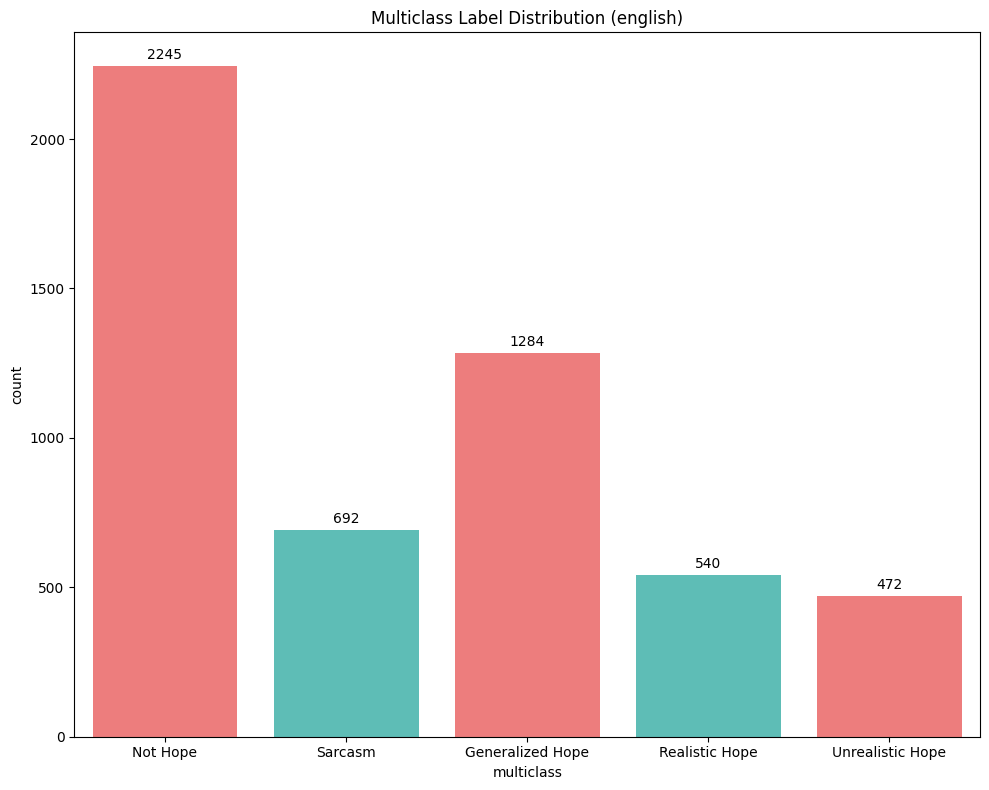


[TEXT LENGTH STATISTICS]
count    5233.000000
mean       33.770304
std        16.436689
min         4.000000
25%        21.000000
50%        31.000000
75%        44.000000
max       144.000000
Name: text_length, dtype: float64


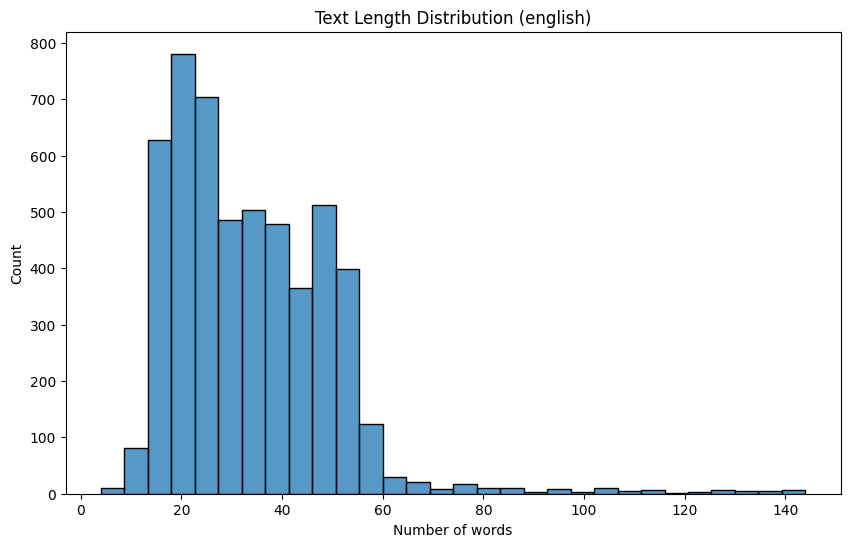

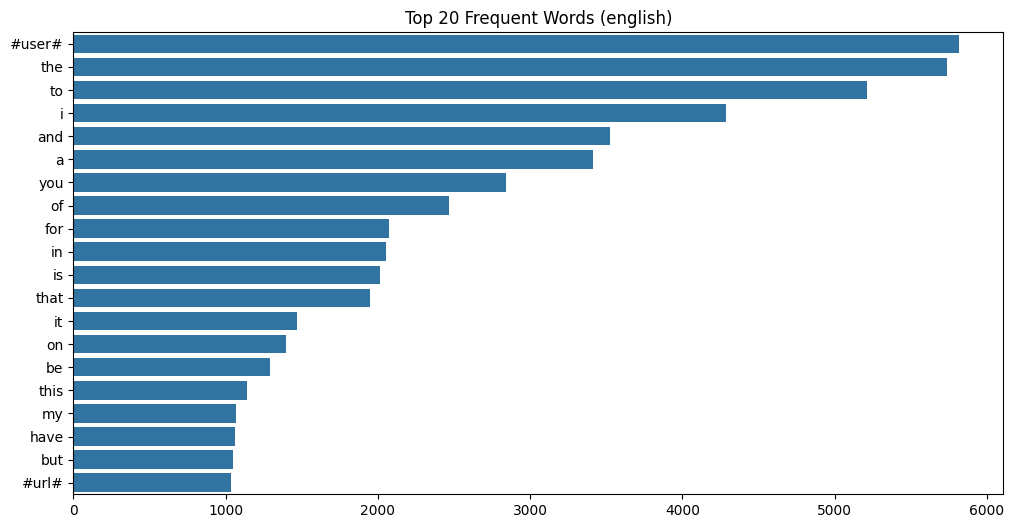

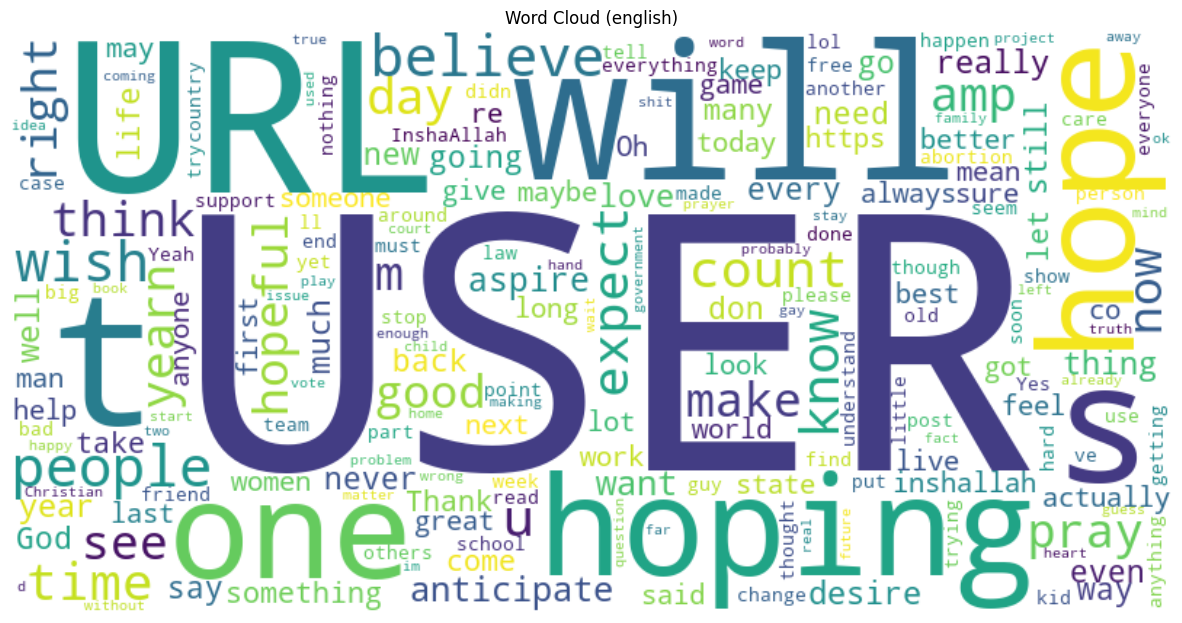


[MISSING VALUES]
text           0
binary         0
multiclass     0
text_length    0
dtype: int64

----------------------------------------
DATA ANALYSIS (SPANISH)
----------------------------------------

[BASIC INFORMATION]
Number of samples: 11243
Columns: ['text', 'binary', 'multiclass']

First 5 rows:
                                                text binary        multiclass
0  🎬Outer Banks🎬 (temporada 3) la verdad que teni...   Hope  Generalized Hope
1  -Después del poco éxito en el grupo de la Jet ...   Hope  Generalized Hope
2  Bárbara López yo te rezo y te hago un monument...   Hope  Generalized Hope
3  RT #USER# #USER# #USER# Ojalá nos ayuden a des...   Hope    Realistic Hope
4  #USER# No tengo las palabras justas. Pero rezo...   Hope    Realistic Hope


/var/folders/xy/f_0951d57tl5wyqr062y27_40000gn/T/ipykernel_12873/2164567208.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='multiclass', data=data, palette=['#FF6B6B', '#4ECDC4'])
/var/folders/xy/f_0951d57tl5wyqr062y27_40000gn/T/ipykernel_12873/2164567208.py:48: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='multiclass', data=data, palette=['#FF6B6B', '#4ECDC4'])


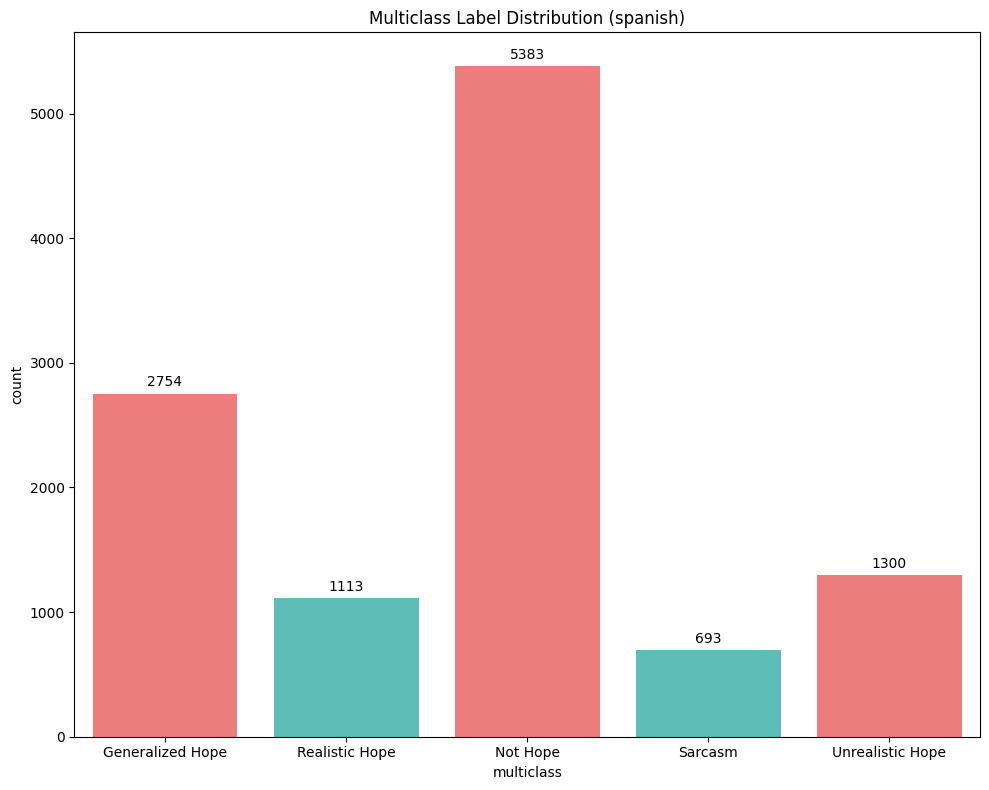


[TEXT LENGTH STATISTICS]
count    11243.000000
mean        26.773904
std         15.846374
min          4.000000
25%         15.000000
50%         22.000000
75%         36.000000
max        172.000000
Name: text_length, dtype: float64


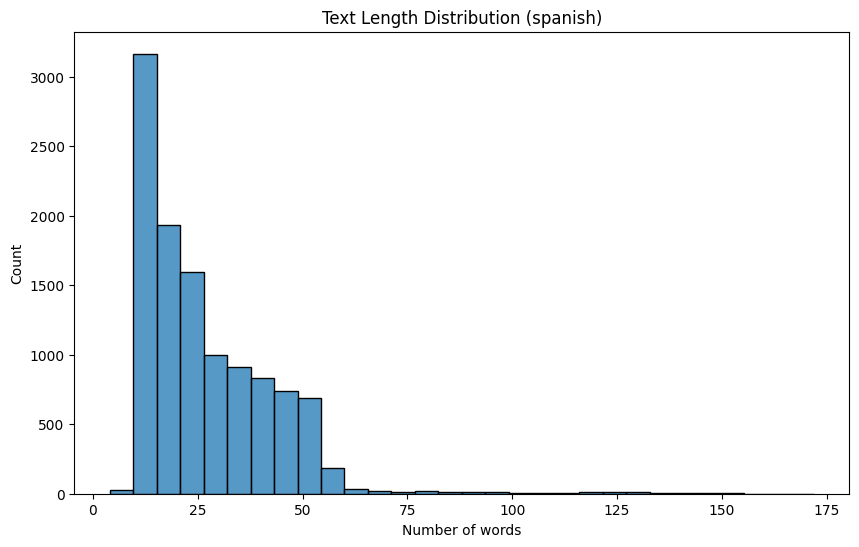

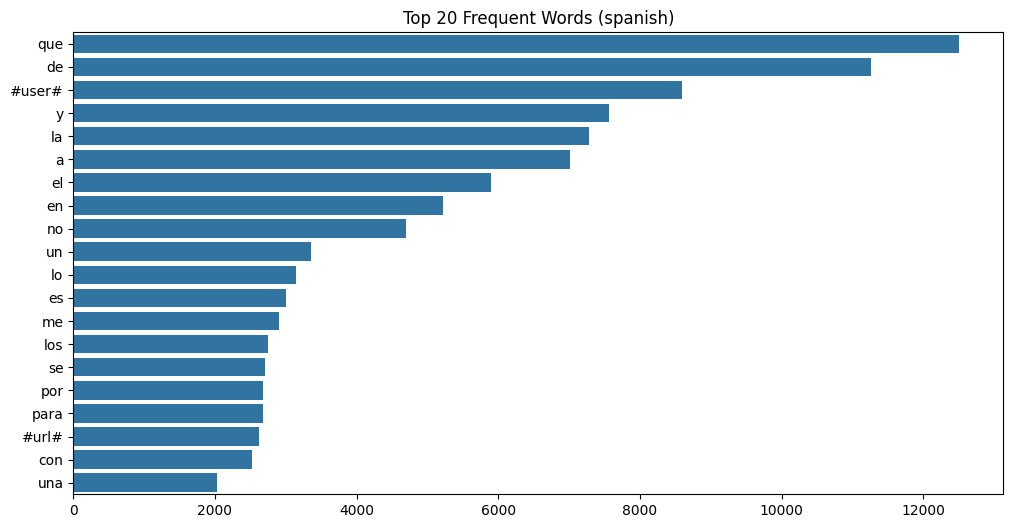

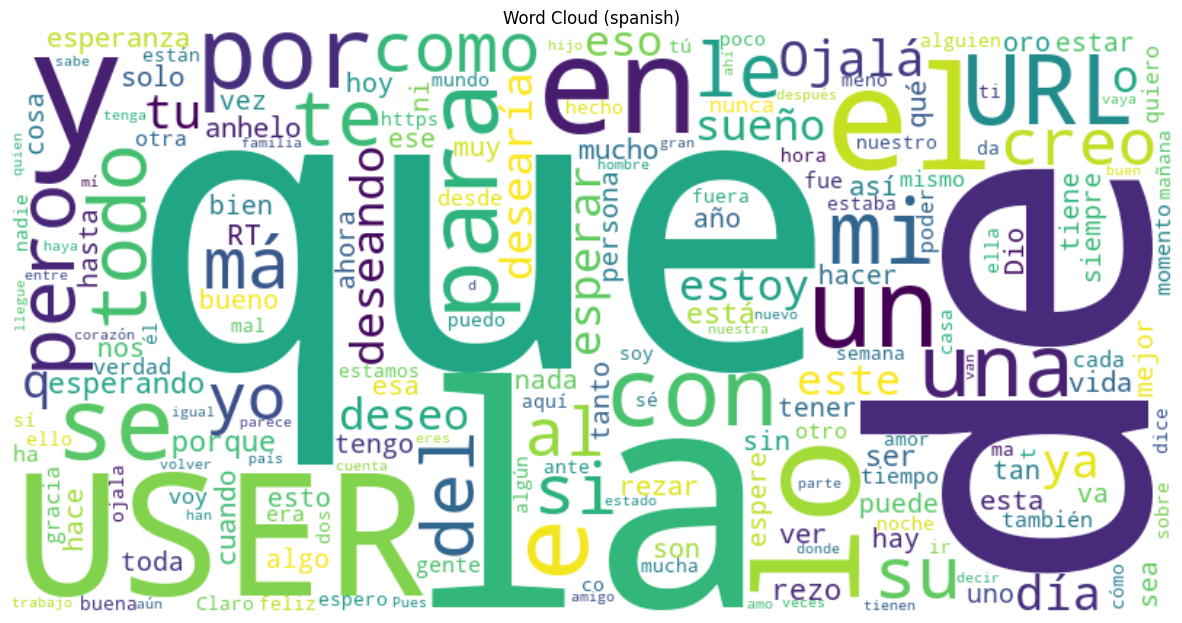


[MISSING VALUES]
text           0
binary         0
multiclass     0
text_length    0
dtype: int64


In [6]:
# Create data loader
data_loader = LoadData(
        en_file_path='../data/en_train.csv',
        es_file_path='../data/es_train.csv'
)

# Create and use EDA
eda = EDA(data_loader)
eda.load_data()
eda.analyze_data(language='english')
eda.analyze_data(language='spanish')

# Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize

class Preprocessing:
    def __init__(self, data_loader):
        self.data_loader = data_loader
        self.df_en = None
        self.df_es = None
        self.label_encoder_multiclass = LabelEncoder()  # Initialize the label encoder

    def load_data(self):
        self.df_en, self.df_es = self.data_loader.load()

    def clean_text_en(self, text):
        # Tokenize text
        tokens = word_tokenize(text)
        # Join tokens back into a single string
        return ' '.join(tokens)

    def clean_text_es(self, text):
        # Tokenize text
        tokens = word_tokenize(text)
        # Join tokens back into a single string
        return ' '.join(tokens)
    
    def encode_labels(self):
        # Encode English labels
        print("Encoding English labels...")
        self.df_en['multiclass_encoded'] = self.label_encoder_multiclass.fit_transform(self.df_en['multiclass'])
        
        # Encode Spanish labels
        print("Encoding Spanish labels...")
        self.df_es['multiclass_encoded'] = self.label_encoder_multiclass.transform(self.df_es['multiclass'])

    def preprocess_text_columns(self):
        print("Preprocessing English text...")
        self.df_en['cleaned_text'] = self.df_en['text'].apply(self.clean_text_en)
        
        print("Preprocessing Spanish text...")
        self.df_es['cleaned_text'] = self.df_es['text'].apply(self.clean_text_es)

    def save_preprocessed_data(self, en_output_path, es_output_path):
        print("Saving preprocessed English data...")
        self.df_en.to_csv(en_output_path, index=False)
        print(f"English data saved to {en_output_path}")
        
        print("Saving preprocessed Spanish data...")
        self.df_es.to_csv(es_output_path, index=False)
        print(f"Spanish data saved to {es_output_path}")

In [4]:
# Create data loader
data_loader = LoadData(
        en_file_path='../data/en_train.csv',
        es_file_path='../data/es_train.csv'
)

# Create and use EDA
preprocessing = Preprocessing(data_loader)
preprocessing.load_data()

# Clean text
preprocessing.preprocess_text_columns()

# Encode labels
preprocessing.encode_labels()

# Save preprocessed data
preprocessing.save_preprocessed_data(
        en_output_path='../data/en_train_preprocessed_mul.csv',
        es_output_path='../data/es_train_preprocessed_mul.csv'
)

Loading English data...
English data loaded successfully.
Loading Spanish data...
Spanish data loaded successfully.
Preprocessing English text...
Preprocessing Spanish text...
Encoding English labels...
Encoding Spanish labels...
Saving preprocessed English data...
English data saved to ../data/en_train_preprocessed_mul.csv
Saving preprocessed Spanish data...
Spanish data saved to ../data/es_train_preprocessed_mul.csv


In [5]:
# Create data loader
data_loader = LoadData(
        en_file_path='../data/en_dev.csv',
        es_file_path='../data/es_dev.csv'
)

# Create and use EDA
preprocessing = Preprocessing(data_loader)
preprocessing.load_data()

# Clean text
preprocessing.preprocess_text_columns()

# Encode labels
preprocessing.encode_labels()

# Save preprocessed data
preprocessing.save_preprocessed_data(
        en_output_path='../data/en_dev_preprocessed_mul.csv',
        es_output_path='../data/es_dev_preprocessed_mul.csv'
)

Loading English data...
English data loaded successfully.
Loading Spanish data...
Spanish data loaded successfully.
Preprocessing English text...
Preprocessing Spanish text...
Encoding English labels...
Encoding Spanish labels...
Saving preprocessed English data...
English data saved to ../data/en_dev_preprocessed_mul.csv
Saving preprocessed Spanish data...
Spanish data saved to ../data/es_dev_preprocessed_mul.csv


# Vectorization

In [108]:
import numpy as np
import random
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

class Vectorization:
    def __init__(self, data_loader):
        self.data_loader = data_loader
        self.df_en = None
        self.df_es = None

        # Vectorizers với tham số tối ưu
        self.count_vec_en = CountVectorizer(
            max_features=10000,
            ngram_range=(1,3),
            min_df=1,
            max_df=0.9
        )
        
        self.tfidf_vec_en = TfidfVectorizer(
            max_features=10000,
            ngram_range=(1,3),
            min_df=1,
            max_df=0.9
        )

        self.count_vec_es = CountVectorizer(
            max_features=10000,
            ngram_range=(1,3),
            min_df=1,
            max_df=0.9
        )
        
        self.tfidf_vec_es = TfidfVectorizer(
            max_features=10000,
            ngram_range=(1,3),
            min_df=1,
            max_df=0.9
        )

        self.w2v_model_en = None
        self.w2v_model_es = None
        self.d2v_model_en_dm = None
        self.d2v_model_en_dbow = None
        self.d2v_model_es_dm = None
        self.d2v_model_es_dbow = None

    def load_data(self):
        self.df_en, self.df_es = self.data_loader.load()

    def create_bow_features(self):
        self.bow_features_en = self.count_vec_en.fit_transform(self.df_en['cleaned_text'])
        self.bow_features_es = self.count_vec_es.fit_transform(self.df_es['cleaned_text'])
        return self.bow_features_en, self.bow_features_es

    def create_tfidf_features(self):
        self.tfidf_features_en = self.tfidf_vec_en.fit_transform(self.df_en['cleaned_text'])
        self.tfidf_features_es = self.tfidf_vec_es.fit_transform(self.df_es['cleaned_text'])
        return self.tfidf_features_en, self.tfidf_features_es

    def create_word2vec_features(self, vector_size=300, window=10, min_count=4, epochs=100):
        """Create enhanced Word2Vec features using multiple approaches"""
        
        print("\nCreating enhanced Word2Vec features...")
        
        # 1. Prepare texts with better preprocessing
        texts_en = [text.split() for text in self.df_en['cleaned_text']]
        texts_es = [text.split() for text in self.df_es['cleaned_text']]

        # 2. Train multiple Word2Vec models with different architectures
        # CBOW model
        self.w2v_model_en_cbow = Word2Vec(
            sentences=texts_en,
            vector_size=vector_size,
            window=window,
            min_count=min_count,
            workers=8,
            sg=0,  # CBOW
            epochs=epochs,
            negative=10
        )
        
        # Skip-gram model
        self.w2v_model_en_sg = Word2Vec(
            sentences=texts_en,
            vector_size=vector_size,
            window=window,
            min_count=min_count,
            workers=8,
            sg=1,  # Skip-gram
            epochs=epochs,
            negative=10
        )
        
        # Same for Spanish
        self.w2v_model_es_cbow = Word2Vec(
            sentences=texts_es,
            vector_size=vector_size,
            window=window,
            min_count=min_count,
            workers=8,
            sg=0,
            epochs=epochs,
            negative=10
        )
        
        self.w2v_model_es_sg = Word2Vec(
            sentences=texts_es,
            vector_size=vector_size,
            window=window,
            min_count=min_count,
            workers=8,
            sg=1,
            epochs=epochs,
            negative=10
        )

        # 3. Combine vectors using weighted averaging
        def get_enhanced_vector(tokens, cbow_model, sg_model):
            # Get vectors from both models
            try:
                cbow_vec = cbow_model.wv.get_mean_vector(tokens, pre_normalize=True)
                sg_vec = sg_model.wv.get_mean_vector(tokens, pre_normalize=True)
                
                # Calculate weights based on token frequency
                weights = []
                for token in tokens:
                    # More frequent words get higher weight
                    freq = max(cbow_model.wv.get_vecattr(token, "count") if token in cbow_model.wv else 0,
                            sg_model.wv.get_vecattr(token, "count") if token in sg_model.wv else 0)
                    weights.append(np.log(1 + freq))
                
                # Normalize weights
                weights = np.array(weights)
                weights = weights / weights.sum() if weights.sum() > 0 else np.ones_like(weights) / len(weights)
                
                # Weighted combination of vectors
                combined_vec = 0.5 * cbow_vec + 0.5 * sg_vec
                
                # Apply frequency weights
                weighted_vec = np.average(
                    np.vstack([cbow_vec, sg_vec]), 
                    weights=[0.5, 0.5],
                    axis=0
                )
                
                return weighted_vec
                
            except KeyError:
                return np.zeros(vector_size)

        # Create enhanced features
        print("Creating English vectors...")
        self.w2v_features_en = np.array([
            get_enhanced_vector(tokens, self.w2v_model_en_cbow, self.w2v_model_en_sg)
            for tokens in texts_en
        ])
        
        print("Creating Spanish vectors...")
        self.w2v_features_es = np.array([
            get_enhanced_vector(tokens, self.w2v_model_es_cbow, self.w2v_model_es_sg)
            for tokens in texts_es
        ])

        return self.w2v_features_en, self.w2v_features_es


    def transform_new_text(self, texts, method='doc2vec', language='english'):
        if method == 'bow':
            vectorizer = self.count_vec_en if language == 'english' else self.count_vec_es
            return vectorizer.transform(texts)

        elif method == 'tfidf':
            vectorizer = self.tfidf_vec_en if language == 'english' else self.tfidf_vec_es
            return vectorizer.transform(texts)

        elif method == 'word2vec':
            cbow_model = self.w2v_model_en_cbow if language == 'english' else self.w2v_model_es_cbow
            sg_model = self.w2v_model_en_sg if language == 'english' else self.w2v_model_es_sg
            
            vectors = []
            for text in texts:
                tokens = text.split()
                # Get vectors from both models
                try:
                    cbow_vec = cbow_model.wv.get_mean_vector(tokens, pre_normalize=True)
                    sg_vec = sg_model.wv.get_mean_vector(tokens, pre_normalize=True)
                    # Combine vectors with equal weights
                    combined_vec = 0.5 * cbow_vec + 0.5 * sg_vec
                    vectors.append(combined_vec)
                except KeyError:
                    vectors.append(np.zeros(cbow_model.vector_size))
                    
            return np.array(vectors)


In [109]:
# Load training data
train_loader = LoadData(
    en_file_path='../data/en_train_preprocessed_mul.csv',
    es_file_path='../data/es_train_preprocessed_mul.csv'
)
train_vectorizer = Vectorization(train_loader)
train_vectorizer.load_data()

# Fit vectorizers on training data
bow_train_en, bow_train_es = train_vectorizer.create_bow_features()
tfidf_train_en, tfidf_train_es = train_vectorizer.create_tfidf_features()
w2v_train_en, w2v_train_es = train_vectorizer.create_word2vec_features()

# Extract labels
y_train_en = train_vectorizer.df_en['multiclass_encoded'].tolist()
y_train_es = train_vectorizer.df_es['multiclass_encoded'].tolist()

# Print shapes
print("\n--------------- English Train Data ---------------")
print(f"BOW shape:      {bow_train_en.shape}")
print(f"TF-IDF shape:   {tfidf_train_en.shape}")
print(f"Word2Vec shape: {w2v_train_en.shape}")

print("\n--------------- Spanish Train Data ---------------")
print(f"BOW shape:      {bow_train_es.shape}")
print(f"TF-IDF shape:   {tfidf_train_es.shape}")
print(f"Word2Vec shape: {w2v_train_es.shape}")


Loading English data...
English data loaded successfully.
Loading Spanish data...
Spanish data loaded successfully.

Creating enhanced Word2Vec features...
Creating English vectors...
Creating Spanish vectors...

--------------- English Train Data ---------------
BOW shape:      (5233, 10000)
TF-IDF shape:   (5233, 10000)
Word2Vec shape: (5233, 300)

--------------- Spanish Train Data ---------------
BOW shape:      (11243, 10000)
TF-IDF shape:   (11243, 10000)
Word2Vec shape: (11243, 300)


In [110]:
# Load test data
test_loader = LoadData(
    en_file_path='../data/en_dev_preprocessed_mul.csv',
    es_file_path='../data/es_dev_preprocessed_mul.csv'
)
test_vectorizer = Vectorization(test_loader)
test_vectorizer.load_data()

bow_test_en = train_vectorizer.count_vec_en.transform(test_vectorizer.df_en['cleaned_text'])
bow_test_es = train_vectorizer.count_vec_es.transform(test_vectorizer.df_es['cleaned_text'])

tfidf_test_en = train_vectorizer.tfidf_vec_en.transform(test_vectorizer.df_en['cleaned_text'])
tfidf_test_es = train_vectorizer.tfidf_vec_es.transform(test_vectorizer.df_es['cleaned_text'])

w2v_test_en = train_vectorizer.transform_new_text(test_vectorizer.df_en['cleaned_text'], method='word2vec', language='english')
w2v_test_es = train_vectorizer.transform_new_text(test_vectorizer.df_es['cleaned_text'], method='word2vec', language='spanish')

# Extract labels
y_test_en = test_vectorizer.df_en['multiclass_encoded'].tolist()
y_test_es = test_vectorizer.df_es['multiclass_encoded'].tolist()

# Print shapes
print("\n--------------- English Test Data ---------------")
print(f"BOW shape:      {bow_test_en.shape}")
print(f"TF-IDF shape:   {tfidf_test_en.shape}")
print(f"Word2Vec shape: {w2v_test_en.shape}")

print("\n--------------- Spanish Test Data ---------------")
print(f"BOW shape:      {bow_test_es.shape}")
print(f"TF-IDF shape:   {tfidf_test_es.shape}")
print(f"Word2Vec shape: {w2v_test_es.shape}")


Loading English data...
English data loaded successfully.
Loading Spanish data...
Spanish data loaded successfully.

--------------- English Test Data ---------------
BOW shape:      (1902, 10000)
TF-IDF shape:   (1902, 10000)
Word2Vec shape: (1902, 300)

--------------- Spanish Test Data ---------------
BOW shape:      (4088, 10000)
TF-IDF shape:   (4088, 10000)
Word2Vec shape: (4088, 300)


# Model

## SVM

### SVM with linear kernel

In [111]:
class SVMClassifier:
    def __init__(self, kernel='linear', C=1.0):
        self.svm_en = SVC(kernel=kernel, C=C)
        self.svm_es = SVC(kernel=kernel, C=C)
        self.best_params_en = None
        self.best_params_es = None

    def grid_search(self, X_train, y_train, language='english'):
        """Perform GridSearchCV for hyperparameter tuning."""
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 0.01, 0.1, 1] if 'rbf' in ['rbf'] else ['scale']
        }
        grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        print(f"Running GridSearchCV for {language}...")
        grid.fit(X_train, y_train)

        print(f"Best parameters for {language}: {grid.best_params_}")
        if language == 'english':
            self.svm_en = grid.best_estimator_
            self.best_params_en = grid.best_params_
        else:
            self.svm_es = grid.best_estimator_
            self.best_params_es = grid.best_params_

    def train(self, X_train, y_train, language='english', use_grid_search=False):
        if use_grid_search:
            self.grid_search(X_train, y_train, language)
        else:
            if language == 'english':
                print(f"Training English data shape: X={X_train.shape}")
                self.svm_en.fit(X_train, y_train)
            else:
                print(f"Training Spanish data shape: X={X_train.shape}")
                self.svm_es.fit(X_train, y_train)

    def predict(self, X_test, language='english'):
        return self.svm_en.predict(X_test) if language == 'english' else self.svm_es.predict(X_test)

    def evaluate(self, X_test, y_test, language='english'):
        y_pred = self.predict(X_test, language)
        model = self.svm_en if language == 'english' else self.svm_es
        print(f"\nResults for {language.capitalize()} model:")
        print(f"Test data shape: X={X_test.shape}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Selected Kernel: {model.kernel}")
        print(f"Selected Parameters: C={model.C}, Gamma={getattr(model, 'gamma', 'N/A')}")

In [112]:
print("\n========== BOW-SVM ========= ")
bow_svm = SVMClassifier()
bow_svm.train(bow_train_en, y_train_en, 'english')
bow_svm.train(bow_train_es, y_train_es, 'spanish')
bow_svm.evaluate(bow_test_en, y_test_en, 'english')
bow_svm.evaluate(bow_test_es, y_test_es, 'spanish')

print("\n=========  TF-IDF-SVM ========= ")
tfidf_svm = SVMClassifier()
tfidf_svm.train(tfidf_train_en, y_train_en, 'english')
tfidf_svm.train(tfidf_train_es, y_train_es, 'spanish')
tfidf_svm.evaluate(tfidf_test_en, y_test_en, 'english')
tfidf_svm.evaluate(tfidf_test_es, y_test_es, 'spanish')

print("\n=========  Word2Vec-SVM ========= ")
w2v_svm = SVMClassifier()
w2v_svm.train(w2v_train_en, y_train_en, 'english')
w2v_svm.train(w2v_train_es, y_train_es, 'spanish')
w2v_svm.evaluate(w2v_test_en, y_test_en, 'english')
w2v_svm.evaluate(w2v_test_es, y_test_es, 'spanish')


========== BOW-SVM ========= 
Training English data shape: X=(5233, 10000)
Training Spanish data shape: X=(11243, 10000)

Results for English model:
Test data shape: X=(1902, 10000)
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       467
           1       0.75      0.77      0.76       816
           2       0.47      0.35      0.40       196
           3       0.95      0.90      0.92       252
           4       0.52      0.42      0.47       171

    accuracy                           0.67      1902
   macro avg       0.64      0.61      0.62      1902
weighted avg       0.67      0.67      0.67      1902

Accuracy: 0.6698
Selected Kernel: linear
Selected Parameters: C=1.0, Gamma=scale

Results for Spanish model:
Test data shape: X=(4088, 10000)
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1001
           1       0.76      0.

/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Results for Spanish model:
Test data shape: X=(4088, 300)
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.37      0.47      1001
           1       0.56      0.96      0.71      1958
           2       0.00      0.00      0.00       405
           3       0.94      0.52      0.67       251
           4       0.00      0.00      0.00       473

    accuracy                           0.58      4088
   macro avg       0.43      0.37      0.37      4088
weighted avg       0.48      0.58      0.49      4088

Accuracy: 0.5834
Selected Kernel: linear
Selected Parameters: C=1.0, Gamma=scale


/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## NAIVE BAYES

In [113]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

class BayesClassifier:
    def __init__(self):
        self.models = {'english': None, 'spanish': None}
        self.best_alphas = {'english': 1.0, 'spanish': 1.0}

    def _is_multinomial(self, method):
        return method in ['bow', 'tfidf']

    def _get_model(self, method, alpha=1.0):
        return MultinomialNB(alpha=alpha) if self._is_multinomial(method) else GaussianNB()

    def train(self, X_train, y_train, lang='english', method='bow', grid_search=False):
        if grid_search and self._is_multinomial(method):
            param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}
            print(f"[GridSearch] {lang.capitalize()} - {method.upper()}")
            grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            self.models[lang] = grid.best_estimator_
            self.best_alphas[lang] = grid.best_params_['alpha']
            print(f"→ Best alpha: {grid.best_params_['alpha']}")
        else:
            model = self._get_model(method)
            model.fit(X_train, y_train)
            self.models[lang] = model

    def predict(self, X_test, lang='english'):
        return self.models[lang].predict(X_test)

    def evaluate(self, X_test, y_test, lang='english', method='bow'):
        y_pred = self.predict(X_test, lang)
        acc = accuracy_score(y_test, y_pred)
        print(f"\n=== Evaluation: {lang.capitalize()} - {method.upper()} ===")
        print(classification_report(y_test, y_pred))
        if self._is_multinomial(method):
            print(f"Selected Alpha: {self.best_alphas[lang]}")
        print(f"Accuracy: {acc:.4f}")
        return acc

    @staticmethod
    def cross_validate(X, y, lang='english', method='bow', alpha=1.0):
        print(f"\n[Cross-Validation] {lang.capitalize()} - {method.upper()}")
        model = MultinomialNB(alpha=alpha) if method in ['bow', 'tfidf'] else GaussianNB()
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        print(f"Mean CV Accuracy: {scores.mean():.4f}")
        return scores.mean()


In [114]:
# BOW
bow_clf = BayesClassifier()
bow_clf.train(bow_train_en, y_train_en, 'english', method='bow', grid_search=True)
bow_clf.train(bow_train_es, y_train_es, 'spanish', method='bow', grid_search=True)
bow_clf.evaluate(bow_test_en, y_test_en, 'english', method='bow')
bow_clf.evaluate(bow_test_es, y_test_es, 'spanish', method='bow')
BayesClassifier.cross_validate(bow_train_en, y_train_en, 'english', method='bow', alpha=bow_clf.best_alphas['english'])
BayesClassifier.cross_validate(bow_train_es, y_train_es, 'spanish', method='bow', alpha=bow_clf.best_alphas['spanish'])

# TF-IDF
tfidf_clf = BayesClassifier()
tfidf_clf.train(tfidf_train_en, y_train_en, 'english', method='tfidf', grid_search=True)
tfidf_clf.train(tfidf_train_es, y_train_es, 'spanish', method='tfidf', grid_search=True)
tfidf_clf.evaluate(tfidf_test_en, y_test_en, 'english', method='tfidf')
tfidf_clf.evaluate(tfidf_test_es, y_test_es, 'spanish', method='tfidf')
BayesClassifier.cross_validate(tfidf_train_en, y_train_en, 'english', method='tfidf', alpha=tfidf_clf.best_alphas['english'])
BayesClassifier.cross_validate(tfidf_train_es, y_train_es, 'spanish', method='tfidf', alpha=tfidf_clf.best_alphas['spanish'])

# Word2Vec (GaussianNB)
w2v_clf = BayesClassifier()
w2v_clf.train(w2v_train_en, y_train_en, 'english', method='word2vec')
w2v_clf.train(w2v_train_es, y_train_es, 'spanish', method='word2vec')
w2v_clf.evaluate(w2v_test_en, y_test_en, 'english', method='word2vec')
w2v_clf.evaluate(w2v_test_es, y_test_es, 'spanish', method='word2vec')
BayesClassifier.cross_validate(w2v_train_en, y_train_en, 'english', method='word2vec')
BayesClassifier.cross_validate(w2v_train_es, y_train_es, 'spanish', method='word2vec')


[GridSearch] English - BOW
→ Best alpha: 1.0
[GridSearch] Spanish - BOW
→ Best alpha: 2.0

=== Evaluation: English - BOW ===
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       467
           1       0.69      0.80      0.74       816
           2       0.49      0.32      0.38       196
           3       0.89      0.69      0.78       252
           4       0.55      0.30      0.39       171

    accuracy                           0.65      1902
   macro avg       0.63      0.55      0.57      1902
weighted avg       0.65      0.65      0.64      1902

Selected Alpha: 1.0
Accuracy: 0.6472

=== Evaluation: Spanish - BOW ===
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      1001
           1       0.71      0.84      0.77      1958
           2       0.50      0.26      0.35       405
           3       0.94      0.77      0.85       251
           4       0.51      0.36      0.42

0.4003376747910103

## KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

class KNNClassifier:
    def __init__(self, n_neighbors=5, metric='cosine'):
        self.knn_en = {}
        self.knn_es = {}
        self.n_neighbors = n_neighbors
        self.metric = metric

    def train(self, X_train, y_train, language='english', method='bow'):
        model = KNeighborsClassifier(n_neighbors=self.n_neighbors, metric=self.metric)
        model.fit(X_train, y_train)

        if language == 'english':
            print(f"Training English data shape: X={X_train.shape}")
            self.knn_en[method] = model
        else:
            print(f"Training Spanish data shape: X={X_train.shape}")
            self.knn_es[method] = model

    def predict(self, X_test, language='english', method='bow'):
        if language == 'english':
            return self.knn_en[method].predict(X_test)
        else:
            return self.knn_es[method].predict(X_test)

    def evaluate(self, X_test, y_test, language='english', method='bow'):
        if X_test.shape[0] != len(y_test):
            raise ValueError(f"Mismatch: X_test has {X_test.shape[0]} samples but y_test has {len(y_test)} labels")

        y_pred = self.predict(X_test, language, method)
        acc = accuracy_score(y_test, y_pred)
        print(f"\nResults for {language.capitalize()} model ({method.upper()}):")
        print(f"Test data shape: X={X_test.shape}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {acc:.4f}")
        return acc  

    @staticmethod
    def cross_validate_knn(X, y, method='bow', language='english', n_neighbors=5, metric='cosine', cv=5):
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

        mean_acc = scores.mean()
        print(f"Cross-validated Accuracy for {language.capitalize()} model ({method.upper()}): {mean_acc:.4f}")
        return mean_acc

    @staticmethod
    def grid_search_k(X_train, y_train, language='english', method='bow', metric='cosine', cv=5, k_range=range(1, 21)):
        print(f"\n🔍 Grid searching best k for {language.capitalize()} ({method.upper()})...")
        param_grid = {'n_neighbors': list(k_range)}
        grid = GridSearchCV(KNeighborsClassifier(metric=metric), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_k = grid.best_params_['n_neighbors']
        print(f"✅ Best k for {language.capitalize()} ({method.upper()}): {best_k}")
        return best_k


In [ ]:
print("\n========== KNN - BOW =========")
best_k_bow_en = KNNClassifier.grid_search_k(bow_train_en, y_train_en, 'english', 'bow')
best_k_bow_es = KNNClassifier.grid_search_k(bow_train_es, y_train_es, 'spanish', 'bow')

knn = KNNClassifier(n_neighbors=best_k_bow_en)
knn.train(bow_train_en, y_train_en, 'english', 'bow')
knn.n_neighbors = best_k_bow_es
knn.train(bow_train_es, y_train_es, 'spanish', 'bow')

acc_bow_en = knn.evaluate(bow_test_en, y_test_en, 'english', 'bow')
acc_bow_es = knn.evaluate(bow_test_es, y_test_es, 'spanish', 'bow')

KNNClassifier.cross_validate_knn(bow_train_en, y_train_en, 'bow', 'english', best_k_bow_en)
KNNClassifier.cross_validate_knn(bow_train_es, y_train_es, 'bow', 'spanish', best_k_bow_es)


print("\n========== KNN - TF-IDF =========")
best_k_tfidf_en = KNNClassifier.grid_search_k(tfidf_train_en, y_train_en, 'english', 'tfidf')
best_k_tfidf_es = KNNClassifier.grid_search_k(tfidf_train_es, y_train_es, 'spanish', 'tfidf')

knn.n_neighbors = best_k_tfidf_en
knn.train(tfidf_train_en, y_train_en, 'english', 'tfidf')
knn.n_neighbors = best_k_tfidf_es
knn.train(tfidf_train_es, y_train_es, 'spanish', 'tfidf')

acc_tfidf_en = knn.evaluate(tfidf_test_en, y_test_en, 'english', 'tfidf')
acc_tfidf_es = knn.evaluate(tfidf_test_es, y_test_es, 'spanish', 'tfidf')

KNNClassifier.cross_validate_knn(tfidf_train_en, y_train_en, 'tfidf', 'english', best_k_tfidf_en)
KNNClassifier.cross_validate_knn(tfidf_train_es, y_train_es, 'tfidf', 'spanish', best_k_tfidf_es)


print("\n========== KNN - Word2Vec =========")
best_k_w2v_en = KNNClassifier.grid_search_k(w2v_train_en, y_train_en, 'english', 'w2v')
best_k_w2v_es = KNNClassifier.grid_search_k(w2v_train_es, y_train_es, 'spanish', 'w2v')

knn.n_neighbors = best_k_w2v_en
knn.train(w2v_train_en, y_train_en, 'english', 'w2v')
knn.n_neighbors = best_k_w2v_es
knn.train(w2v_train_es, y_train_es, 'spanish', 'w2v')

acc_w2v_en = knn.evaluate(w2v_test_en, y_test_en, 'english', 'w2v')
acc_w2v_es = knn.evaluate(w2v_test_es, y_test_es, 'spanish', 'w2v')

KNNClassifier.cross_validate_knn(w2v_train_en, y_train_en, 'w2v', 'english', best_k_w2v_en)
KNNClassifier.cross_validate_knn(w2v_train_es, y_train_es, 'w2v', 'spanish', best_k_w2v_es)


========== KNN - BOW =========

🔍 Grid searching best k for English (BOW)...
✅ Best k for English (BOW): 15

🔍 Grid searching best k for Spanish (BOW)...
✅ Best k for Spanish (BOW): 10
Training English data shape: X=(5233, 10000)
Training Spanish data shape: X=(11243, 10000)

Results for English model (BOW):
Test data shape: X=(1902, 10000)
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42       467
           1       0.53      0.76      0.62       816
           2       0.28      0.06      0.09       196
           3       0.51      0.48      0.50       252
           4       0.71      0.09      0.16       171

    accuracy                           0.50      1902
   macro avg       0.50      0.36      0.36      1902
weighted avg       0.50      0.50      0.46      1902

Accuracy: 0.5042

Results for Spanish model (BOW):
Test data shape: X=(4088, 10000)
Classification Report:
              precision    recall  f1

0.5844525601730465

## DECISION TREE

In [ ]:
class MyDecisionTreeClassifier:
    def __init__(self, criterion='gini'):
        self.criterion = criterion
        self.dt_models = {'english': None, 'spanish': None}

    def grid_search(self, X_train, y_train, language='english'):
        print(f"\nRunning GridSearchCV for {language} Decision Tree...")
        param_grid = {'max_depth': [3, 5, 10, 15, 20, None]}
        grid = GridSearchCV(
            SkDecisionTreeClassifier(criterion=self.criterion),
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        print(f"Best max_depth for {language}: {grid.best_params_['max_depth']}")
        print(f"Best cross-val accuracy: {grid.best_score_:.4f}")
        self.dt_models[language] = grid.best_estimator_

    def train(self, X_train, y_train, language='english', use_grid_search=True):
        if use_grid_search:
            self.grid_search(X_train, y_train, language)
        else:
            model = SkDecisionTreeClassifier(criterion=self.criterion)
            model.fit(X_train, y_train)
            self.dt_models[language] = model

    def predict(self, X_test, language='english'):
        model = self.dt_models.get(language)
        if model is None:
            raise ValueError(f"Model for {language} has not been trained.")
        return model.predict(X_test)

    def evaluate(self, X_test, y_test, language='english'):
        y_pred = self.predict(X_test, language)
        print(f"\n===== Results for {language.capitalize()} Decision Tree model =====")
        print(f"Test data shape: X={X_test.shape}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        return acc

In [ ]:
print("\n========== BOW-Decision_Tree ========= ")
bow_decision_tree = MyDecisionTreeClassifier(criterion='gini')
bow_decision_tree.train(bow_train_en, y_train_en, 'english', use_grid_search=True)
bow_decision_tree.train(bow_train_es, y_train_es, 'spanish', use_grid_search=True)
bow_decision_tree.evaluate(bow_test_en, y_test_en, 'english')
bow_decision_tree.evaluate(bow_test_es, y_test_es, 'spanish')

print("\n=========  TF-IDF-Decision_Tree ========= ")
tfidf_decision_tree = MyDecisionTreeClassifier(criterion='gini')
tfidf_decision_tree.train(tfidf_train_en, y_train_en, 'english', use_grid_search=True)
tfidf_decision_tree.train(tfidf_train_es, y_train_es, 'spanish', use_grid_search=True)
tfidf_decision_tree.evaluate(tfidf_test_en, y_test_en, 'english')
tfidf_decision_tree.evaluate(tfidf_test_es, y_test_es, 'spanish')

print("\n=========  Word2Vec-Decision_Tree ========= ")
w2v_decision_tree = MyDecisionTreeClassifier(criterion='gini')
w2v_decision_tree.train(w2v_train_en, y_train_en, 'english', use_grid_search=True)
w2v_decision_tree.train(w2v_train_es, y_train_es, 'spanish', use_grid_search=True)
w2v_decision_tree.evaluate(w2v_test_en, y_test_en, 'english')
w2v_decision_tree.evaluate(w2v_test_es, y_test_es, 'spanish')


========== BOW-Decision_Tree ========= 

Running GridSearchCV for english Decision Tree...
Best max_depth for english: 15
Best cross-val accuracy: 0.6543

Running GridSearchCV for spanish Decision Tree...
Best max_depth for spanish: 20
Best cross-val accuracy: 0.5909

===== Results for English Decision Tree model =====
Test data shape: X=(1902, 10000)
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       467
           1       0.72      0.82      0.77       816
           2       0.35      0.24      0.29       196
           3       0.94      0.92      0.93       252
           4       0.46      0.39      0.42       171

    accuracy                           0.66      1902
   macro avg       0.60      0.57      0.58      1902
weighted avg       0.64      0.66      0.64      1902

Accuracy: 0.6556

===== Results for Spanish Decision Tree model =====
Test data shape: X=(4088, 10000)
Classification Report:
       

/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/trinhtrantran/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

0.5340019569471625